<a href="https://colab.research.google.com/github/ZiliottoFilippo/LCP_projects_Y3/blob/MiloccoRiccardo/Colab_Prel_Proj11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries.
import pandas as pd #for dataframes and reading csv files.
import numpy as np # for math operations(sqrt)
import matplotlib.pyplot as plt #for plotting the graphs


#make the axes white
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
        "axes.titlecolor":"w"}
plt.rcParams.update(params)

In [ ]:
#dataframe from day_od.csv: "day origin and destination"
file_name="day_od.csv"
read_day_od=pd.read_csv(file_name,sep=",",encoding='utf-16', header=0, quoting=3, quotechar='"') #comment: explicit header=0 to replace column names;  
columns=["MONTH","DOW","ORIGIN","DESTINATION","CUST_CLASS","COD_COUNTRY","COD_PRO","PRO_CUM","FLOW"]
read_day_od.columns=columns

day_od=pd.DataFrame(read_day_od)#dataFrame of the file(can be read more easily than csv)
day_od

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_CUM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136
...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36


### Challenge accepted? 
So, convert into datetime the months to check the flow per day within a month  and groupby them for month and day. Then, keeping the month ordering (not also day) try to sort by sum of flows per day

In [ ]:
  #Here's the challenge!

day_od1=day_od.replace([ "Febbraio", "Marzo","Aprile","Maggio","Lunedì","Martedì","Mercoledì","Giovedì", "Venerdì", "Sabato","Domenica"],
                      ["Feb","Mar","Apr","May","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
day_od1["MONTH"]=pd.to_datetime(day_od1["MONTH"], format="%b").dt.month
day_od1.groupby(["MONTH","DOW"], as_index=False).sum()#.sort_values("FLOW")

,MONTH,DOW,ORIGIN,DESTINATION,COD_COUNTRY,COD_PRO,PRO_CUM,FLOW
0,2,Friday,1160463,1096357,1057810,-992792.0,103858710.0,872694
1,2,Monday,1132785,1073294,1076460,-951876.0,102166624.0,848494
2,2,Saturday,1009191,938301,894518,-974556.0,85915548.0,755460
3,2,Sunday,834662,793900,749910,-886460.0,68190075.0,632136
4,2,Thursday,1149223,1095973,1082758,-976898.0,103778100.0,868202
5,2,Tuesday,1160277,1111758,1102710,-933194.0,106264628.0,873941
6,2,Wednesday,1179176,1132523,1110995,-1000793.0,105625679.0,885849
7,3,Friday,1218566,1165232,1128771,-1036160.0,107168275.0,904168
8,3,Monday,1104896,1047582,1050467,-883212.0,100868281.0,870326
9,3,Saturday,1020727,956706,874296,-1019604.0,85221052.0,750633


In [91]:
#Read distinct_users_day.csv
file_name="distinct_users_day.csv"
read_users_day=pd.read_csv(file_name,sep=",",encoding="latin-1")
dist_users_day=pd.DataFrame(read_users_day)

#sorting...
#dist_users_day[dist_users_day["CUST_CLASS"]=="foreigner"].groupby("COD_COUNTRY", as_index=False).sum().sort_values("VISITORS", ascending=False)
dist_users_day[dist_users_day["CUST_CLASS"]=="visitor"].groupby("COD_PRO", as_index=False).sum().sort_values("VISITORS", ascending=False)

,COD_PRO,COD_COUNTRY,PRO_COM,VISITORS
27,28.0,142746.0,18038316.0,1932696
26,27.0,67044.0,8160771.0,620236
23,24.0,148962.0,16145112.0,431952
25,26.0,135420.0,15889144.0,317224
22,23.0,125652.0,13046327.0,181604
...,...,...,...,...
100,102.0,2220.0,1020338.0,428
99,101.0,1554.0,707070.0,368
90,91.0,888.0,364136.0,136
85,86.0,444.0,172018.0,64


In [ ]:

# Getting DataFrame for codici_istat_comune.csv
file_name="codici_istat_comune.csv"
data_cic=pd.read_csv(file_name,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_com=pd.DataFrame(data_cic)
codist_com.head()



,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0


In [ ]:
# Getting DataFrame for codici_istat_provincia.csv
file_name="codici_istat_provincia.csv"
data_cip=pd.read_csv(file_name,sep=",",header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_prov=pd.DataFrame(data_cip)
codist_prov

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
...,...,...,...,...
103,20,91,Nuoro,NU
104,20,92,Cagliari,CA
105,20,95,Oristano,OR
106,20,111,Sud Sardegna,SU


In [ ]:
# Getting DataFrame for codici_nazioni.csv
import csv
file_name="codici_nazioni.csv"
data_cin=pd.read_csv(file_name,delimiter=',',header=0,quoting=2, #quoting=2 "Non-Numerical value ex. "Colombia";
                                error_bad_lines=True,encoding="utf-16",quotechar = '"',escapechar='\r')
codist_naz=pd.DataFrame(data_cin)
codist_naz[108:112]



,COD_COUNTRY,COUNTRY_NAME_IT
108,658.0,"Isola di Sant'Elena, Ascension e Tristan de Cugna"
109,732.0,Colombia
110,740.0,Ecuador
111,746.0,Suriname


In [106]:
#Getting DataFrame for veneto.txt
file_name="Veneto.txt"
data_veneto=pd.read_csv(file_name,delimiter=';',header=0,quoting=0,error_bad_lines=False,encoding="Latin-1")
codist_ven=pd.DataFrame(data_veneto)
codist_ven

ParserError: ignored

In [58]:
# Assignment 2

# read COD_COUNTRY for foreigner, then sum whole visitors
mask=dist_users_day["CUST_CLASS"].str.contains('foreigner')
dist_users_day_1=dist_users_day[mask]
dist_users_day_1=dist_users_day_1.groupby(["COD_COUNTRY"],as_index=False)['VISITORS'].sum()
ranked_20=dist_users_day_1.sort_values( "VISITORS",ascending=False, ignore_index=True).nlargest(20, "VISITORS")
ranked_20

,COD_COUNTRY,VISITORS
0,208.0,129672
1,228.0,116884
2,262.0,109176
3,460.0,107796
4,232.0,96776
5,214.0,71872
6,204.0,70432
7,310.0,64160
8,226.0,59012
9,234.0,46180


In [64]:
# Ranked Countries
cod_coun_ranked_20=["Francia","Svizzera","Germania","Cina","Austria","Spagna","Paesi Bassi",
"Stati Uniti d'America","Romania","Gran Bretagna","Russia","Ungheria","Croazia","Slovenia",
"Belgio","Bulgaria","Polonia","Giappone","Repubblica Ceca","Messico"]
#storing visitor and country names

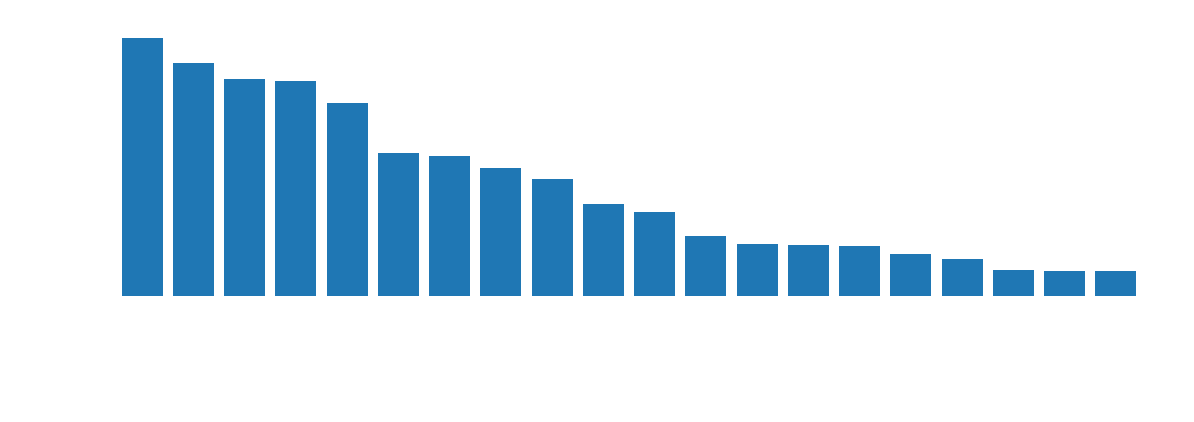

In [65]:
#plotting
plt.bar(cod_coun_ranked_20,ranked_20["VISITORS"])
plt.xticks(rotation='60') # vertical label alignment
plt.rcParams['figure.figsize'] = [20, 5] # 8 by 6 inches
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=15)
plt.title('Ranking of visitors from foreign countries',fontsize=15)
plt.show()

In [103]:
# Assignment 3

# read COD_PRO(province codes) for Italian visitors, then sum whole visitors
mask=dist_users_day["CUST_CLASS"].str.contains('visitor')
dist_users_day_2=dist_users_day[mask].groupby(['COD_PRO'],as_index=False)['VISITORS'].sum()
sorted_dist_users_day_2=dist_users_day_2.sort_values( "VISITORS",ascending=False,ignore_index=True).head(n=20) # sorting as before
sorted_dist_users_day_2

,COD_PRO,VISITORS
0,28.0,1932696
1,27.0,620236
2,24.0,431952
3,26.0,317224
4,23.0,181604
5,15.0,177380
6,29.0,163464
7,58.0,95056
8,37.0,72980
9,22.0,65148


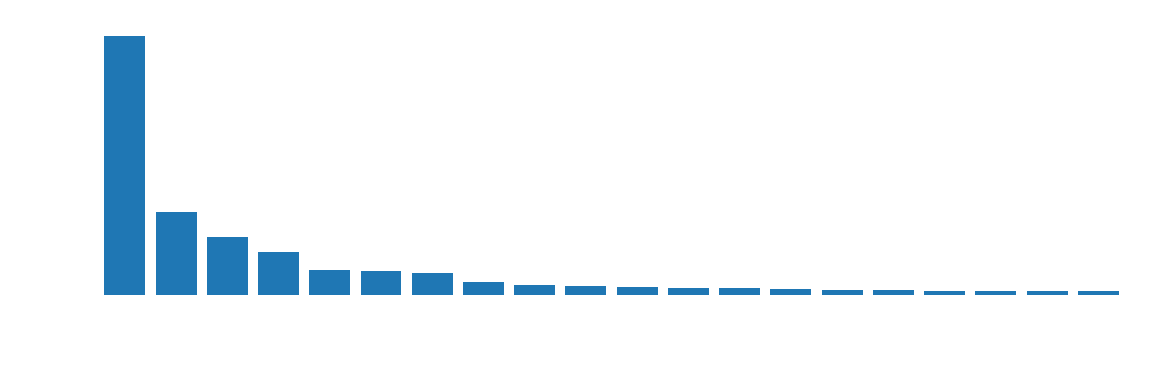

In [100]:
cod_pro_dist_users_day_2=["PADOVA","VENEZIA","VICENZA","TREVISO","VERONA","MILANO","ROVIGO","ROMA","BOLOGNA","TRENTO","FERRARA","UDINE","BELLUNO","TORINO","PORDENONE","BRESCIA","MODENA","MB","MANTOVA","BOLZANO"]

#plotting
plt.rcParams['figure.figsize'] = [20, 5] #10 by 5 inches
plt.bar(cod_pro_dist_users_day_2,sorted_dist_users_day_2["VISITORS"]);
plt.xticks(rotation='60');
plt.xlabel('Countries', fontsize=12);
plt.ylabel('Number of Visitors', fontsize=12);
plt.title('Ranking of Italian visitors by province',fontsize=12);